![example](images/director_shot.jpeg)

# Microsoft Movie Analysis - Project 1

**Authors:** Scott Graham
***

## Overview

The goal is to provide an insight to [Microsoft](https://www.microsoft.com/en-au/movies-and-tv?activetab=movies%3aprimaryr2) regarding the latest box office films and what is popular and most successful so they can leverage this information to provide quality content in their new movie studio. Detailed analysis of what is "hot or not" will ensure that resources are spent developing content that will be widely accepted and best return on investment for Microsoft.

## Business Problem

Microsoft need to provide movie content that is relevant with current trends, to insure that their resource allocation is directed in the right direction to provide the best results. Using the database from [IMDB](https://www.imdb.com/) to gain insights from fan reviews along with critical reviews to provide the best information about what is trending with Microsoft's intended audience.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

[IMDB](https://www.imdb.com/) is one of the largest database for information relating to movies and TV series that includes information about the cast, crew, plot summaries, rating and reviews both critcal and fan-based. We will use this information to determine if speicifc actors are providing the best content, genres, movie themes or anything additional to provide Microsoft with a clear indicator of how to invest their resources for their movie studio.
Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')

In [3]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### BOM Gross Data
General information relevant to the BOM Gross data.

In [6]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#Convert foreign gross to float to match domestic gross

bom_gross['foreign_gross'] = pd.to_numeric(bom_gross['foreign_gross'], errors='coerce')
#If we want to change NaN values to 0:
bom_gross = bom_gross.replace(np.nan, 0, regex=True)
print(bom_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [9]:
#Checking that all titles are unique
bom_gross.duplicated('title').value_counts()

False    3386
True        1
dtype: int64

In [10]:
#Determine what was the repeat
bom_gross['title'].describe()

count          3387
unique         3386
top       Bluebeard
freq              2
Name: title, dtype: object

In [11]:
bom_gross['studio'].describe()

count     3387
unique     258
top        IFC
freq       166
Name: studio, dtype: object

In [12]:
bom_gross['domestic_gross'].describe()

count    3.387000e+03
mean     2.850821e+07
std      6.675575e+07
min      0.000000e+00
25%      1.115000e+05
50%      1.300000e+06
75%      2.750000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [13]:
bom_gross['foreign_gross'].describe()

count    3.387000e+03
mean     4.502979e+07
std      1.126843e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+06
75%      2.915000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

### IMDB Basics Data
General information relevant to the IMDB Basics data

In [14]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
#To check that the numbers are all rows are unique
imdb_basics.duplicated('tconst').value_counts()

False    146144
dtype: int64

In [17]:
#Checking for repeats
imdb_basics.duplicated('primary_title').value_counts()

False    136071
True      10073
dtype: int64

In [18]:
#Checking for repeats
imdb_basics.duplicated('original_title').value_counts()

False    137774
True       8370
dtype: int64

In [19]:
#Checking the frequency of each genre.
imdb_basics['genres'].value_counts()
#Result of this shows that I need to seperate values when multiple genres are grouped together

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [20]:
imdb_basics['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

### IMDB Ratings Data
General information relevant to the IMDB Ratings data

In [21]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [22]:
#To test that all rows are unique
imdb_ratings.duplicated('tconst').value_counts()

False    73856
dtype: int64

In [23]:
imdb_ratings['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [24]:
imdb_ratings['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Data Cleaning
I need to modify:

    Primary and Original title and determine which one to use
    
    Remove symbols before primary title name
    
    Remove columns - orginal_title
    
    Break apart the genres
    
    Combine the foreign and domestic gross to give a total gross column
    

In [25]:
#Need to remove the repeat title in bom_gross 'Bluebeard'
bom_gross = bom_gross.drop_duplicates()

In [26]:
#Rename tconst to reviewid
imdb_basics.rename(columns={'tconst':'reviewid'}, inplace=True)
imdb_basics.head()

,reviewid,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [27]:
#Rename tconst to reviewid
imdb_ratings.rename(columns={'tconst':'reviewid'}, inplace=True)
imdb_ratings.head()

,reviewid,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [28]:
#Removing symbols from primary title name
imdb_basics['primary_title'] = imdb_basics['primary_title'].str.replace("[!,#]", "")

C:\Users\scott\AppData\Local\Temp/ipykernel_15276/2378905604.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_basics['primary_title'] = imdb_basics['primary_title'].str.replace("[!,#]", "")


In [29]:
imdb_basics.sort_values('primary_title').head(10)

,reviewid,primary_title,original_title,start_year,runtime_minutes,genres
88974,tt5144238,$2 a Day,$2 a Day,2015,52.0,Documentary
28591,tt2106284,$50K and a Call Girl: A Love Story,$50K and a Call Girl: A Love Story,2014,90.0,"Action,Adventure,Comedy"
140532,tt9118844,$MOKE,$MOKE,2019,NaN,NaN
70067,tt4004608,$elfie Shootout,$elfie Shootout,2016,86.0,Comedy
33792,tt2258233,$ellebrity,$ellebrity,2012,89.0,Documentary
76834,tt4397606,$kumbagz,$kumbagz,2015,71.0,"Crime,Thriller"
39648,tt2410904,$tiffed or How I Learned to Deal with Dissapoi...,$tiffed or How I Learned to Deal with Dissapoi...,2012,51.0,Comedy
112668,tt6608094,&,&,2017,NaN,NaN
121005,tt7288662,& Jara Hatke,& Jara Hatke,2016,110.0,"Drama,Family,Romance"
36537,tt2332503,&Me,&Me,2013,88.0,Romance


In [30]:
#Remove unnecessary columns
imdb_basics.drop(columns = 'original_title', inplace = True)

In [31]:
imdb_basics.head()

,reviewid,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [32]:
#Add a new column that has the total gross
bom_gross['total_gross'] = bom_gross['domestic_gross'] + bom_gross['foreign_gross']
bom_gross.head()
#can pass a parameter to display it just as numbers using pandas

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [33]:
bom_gross['total_gross'] = pd.to_numeric(bom_gross['total_gross'], errors='coerce')
#If we want to change NaN values to 0:
bom_gross = bom_gross.replace(np.nan, 0, regex=True)
print(bom_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
total_gross       float64
dtype: object


In [34]:
bom_gross['total_gross'] = bom_gross['total_gross'].map(lambda x: '%.0f' % x)

In [35]:
bom_gross['domestic_gross'] = bom_gross['domestic_gross'].map(lambda x: '%.0f' % x)

In [36]:
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].map(lambda x: '%.0f' % x)

In [37]:
bom_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,0,2018,6200
3383,Edward II (2018 re-release),FM,4800,0,2018,4800
3384,El Pacto,Sony,2500,0,2018,2500
3385,The Swan,Synergetic,2400,0,2018,2400


## Merging Datasets
Merging the IMDB datasets for easy comparison of the values.

In [38]:
# to_concat = [imdb_basics, imdb_ratings]
# imdb_comb = pd.concat(to_concat)
# imdb_comb
#The above didn't seem to work. The lower solution works better.

imdb_comb = pd.merge(imdb_basics, imdb_ratings, how = 'inner')
imdb_comb.rename(columns={'primary_title':'title'}, inplace=True)
imdb_comb.sort_values('title')

,reviewid,title,start_year,runtime_minutes,genres,averagerating,numvotes
17401,tt2106284,$50K and a Call Girl: A Love Story,2014,90.0,"Action,Adventure,Comedy",6.8,1818
41912,tt4004608,$elfie Shootout,2016,86.0,Comedy,3.5,101
20738,tt2258233,$ellebrity,2012,89.0,Documentary,5.5,1001
45518,tt4397606,$kumbagz,2015,71.0,"Crime,Thriller",6.4,16
66086,tt7288662,& Jara Hatke,2016,110.0,"Drama,Family,Romance",6.5,13
...,...,...,...,...,...,...,...
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",4.8,51
45685,tt4422510,Üç Iki Bir... Kestik,2014,92.0,Comedy,4.3,88
52301,tt5217114,à propos: philosophie,2016,80.0,Documentary,8.2,5
36816,tt3509772,ärtico,2014,78.0,Drama,6.6,101


In [39]:
imdb_comb.isna().sum()

reviewid              0
title                 0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [40]:
#Now make a table that has the BOM gross value as the key as it has all individual title names
#then add in the columns from the imdb_comb table. Obviously a lot of columns will not be needed
#Why am I doing this? To compare the amount of gross vs it's rating and number of reviews to justify data
total_comb = pd.merge(bom_gross, imdb_comb, how = 'inner')
total_comb.sort_values('total_gross')

,title,studio,domestic_gross,foreign_gross,year,total_gross,reviewid,start_year,runtime_minutes,genres,averagerating,numvotes
1257,Storage 24,Magn.,100,0,2013,100,tt1986953,2012,87.0,"Action,Horror,Mystery",4.4,6229
927,Starry Starry Night,CL,10000,0,2012,10000,tt2084098,2011,99.0,Drama,6.9,1057
891,V/H/S,Magn.,100000,0,2012,100000,tt2105044,2012,116.0,"Horror,Thriller",5.8,53034
1542,The Best Offer,IFC,100000,0,2014,100000,tt1924396,2013,131.0,"Crime,Drama,Mystery",7.8,96073
1205,Man of Tai Chi,RTWC,100000,0,2013,100000,tt2016940,2013,105.0,"Action,Drama",6.1,32991
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Instructions Not Included,LGF,44500000,54600000,2013,99100000,tt3007030,2011,52.0,"Comedy,Romance",8.0,13
649,The Lucky One,WB,60500000,38900000,2012,99400000,tt1327194,2012,101.0,"Drama,Romance",6.5,94359
232,White Lion,Scre.,0,99600,2010,99600,tt1618421,2010,88.0,"Drama,Family",6.7,828
2671,Munna Michael,Eros,99600,0,2017,99600,tt6117702,2017,140.0,"Action,Drama,Music",3.4,2295


In [41]:
#Want to remove duplicates so that we can just view gross values for single titles
total_comb = total_comb.drop_duplicates('title')
total_comb

,title,studio,domestic_gross,foreign_gross,year,total_gross,reviewid,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000,652000000,2010,1067000000,tt0435761,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000,535700000,2010,828300000,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000,513900000,2010,752600000,tt0892791,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,698500000,tt1325004,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000,311500000,2010,623900000,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,Let Yourself Go,Men.,12200,0,2018,12200,tt4932388,2017,99.0,Comedy,6.1,749
2987,Souvenir,Strand,11400,0,2018,11400,tt2387692,2016,90.0,"Drama,Music,Romance",6.0,823
2989,Beauty and the Dogs,Osci.,8900,0,2018,8900,tt6776572,2017,100.0,"Crime,Drama,Thriller",7.0,1016
2990,The Quake,Magn.,6200,0,2018,6200,tt6523720,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [42]:
# Remove unnecessary columns
total_comb.drop(columns = ['start_year','foreign_gross','domestic_gross','reviewid'], inplace = True)

In [43]:
# Check how many values of tot gross have NaN values
total_comb = total_comb.dropna()

In [44]:
total_comb
# Remove NaN values from total_comb

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...
2986,Let Yourself Go,Men.,2018,12200,99.0,Comedy,6.1,749
2987,Souvenir,Strand,2018,11400,90.0,"Drama,Music,Romance",6.0,823
2989,Beauty and the Dogs,Osci.,2018,8900,100.0,"Crime,Drama,Thriller",7.0,1016
2990,The Quake,Magn.,2018,6200,106.0,"Action,Drama,Thriller",6.2,5270


In [45]:
total_comb.isna().sum()

title              0
studio             0
year               0
total_gross        0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [46]:
total_comb['total_gross'] = pd.to_numeric(total_comb['total_gross'], errors='coerce')
#If we want to change NaN values to 0:
total_comb = total_comb.replace(np.nan, 0, regex=True)
print(total_comb.dtypes)

title               object
studio              object
year                 int64
total_gross          int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object


C:\Users\scott\AppData\Local\Temp/ipykernel_15276/3105415208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_comb['total_gross'] = pd.to_numeric(total_comb['total_gross'], errors='coerce')


In [47]:
total_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2991
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2543 non-null   object 
 1   studio           2543 non-null   object 
 2   year             2543 non-null   int64  
 3   total_gross      2543 non-null   int64  
 4   runtime_minutes  2543 non-null   float64
 5   genres           2543 non-null   object 
 6   averagerating    2543 non-null   float64
 7   numvotes         2543 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 178.8+ KB


In [48]:
total_comb[['primary_genre', 'sub_genre', 'other_genre']] = total_comb['genres'].str.split(',', expand=True)
total_comb

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...
2986,Let Yourself Go,Men.,2018,12200,99.0,Comedy,6.1,749,Comedy,None,None
2987,Souvenir,Strand,2018,11400,90.0,"Drama,Music,Romance",6.0,823,Drama,Music,Romance
2989,Beauty and the Dogs,Osci.,2018,8900,100.0,"Crime,Drama,Thriller",7.0,1016,Crime,Drama,Thriller
2990,The Quake,Magn.,2018,6200,106.0,"Action,Drama,Thriller",6.2,5270,Action,Drama,Thriller


In [49]:
#save data to new csv file
imdb_comb.to_csv('./data/cleaned_imdb_comb.csv')
total_comb.to_csv('./data/cleaned_total_comb.csv')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [50]:
total_comb.sort_values('averagerating', ascending=False)

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes,primary_genre,sub_genre,other_genre
2580,The Wall,RAtt.,2017,4500000,78.0,Documentary,9.2,8,Documentary,None,None
2672,The Mayor,WGUSA,2017,96800,68.0,"Comedy,Documentary,Drama",8.9,49,Comedy,Documentary,Drama
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2010,Skin Trade,Magn.,2015,1200,78.0,Documentary,8.8,31,Documentary,None,None
2836,Burn the Stage: The Movie,Trafalgar,2018,20300000,84.0,"Documentary,Music",8.8,2067,Documentary,Music,None
...,...,...,...,...,...,...,...,...,...,...,...
346,Beginning of the Great Revival,CL,2011,58351000,140.0,"Drama,History",2.5,5538,Drama,History,None
2353,Mastizaade,Eros,2016,43400,119.0,Comedy,2.4,2267,Comedy,None,None
1187,Himmatwala,UTV,2013,271000,150.0,"Action,Comedy,Drama",1.7,7384,Action,Comedy,Drama
310,Justin Bieber: Never Say Never,Par.,2011,99000000,105.0,"Documentary,Music",1.6,74978,Documentary,Music,None


In [51]:
total_comb['total_gross'].describe()

count    2.543000e+03
mean     8.003467e+07
std      1.773648e+08
min      1.000000e+02
25%      3.105000e+05
50%      6.600000e+06
75%      7.069700e+07
max      1.405400e+09
Name: total_gross, dtype: float64

In [52]:
total_comb['numvotes'].describe()

count    2.543000e+03
mean     6.995165e+04
std      1.330893e+05
min      5.000000e+00
25%      4.183500e+03
50%      1.777100e+04
75%      7.498850e+04
max      1.841066e+06
Name: numvotes, dtype: float64

In [53]:
total_comb['primary_genre'].describe()

count      2543
unique       15
top       Drama
freq        611
Name: primary_genre, dtype: object

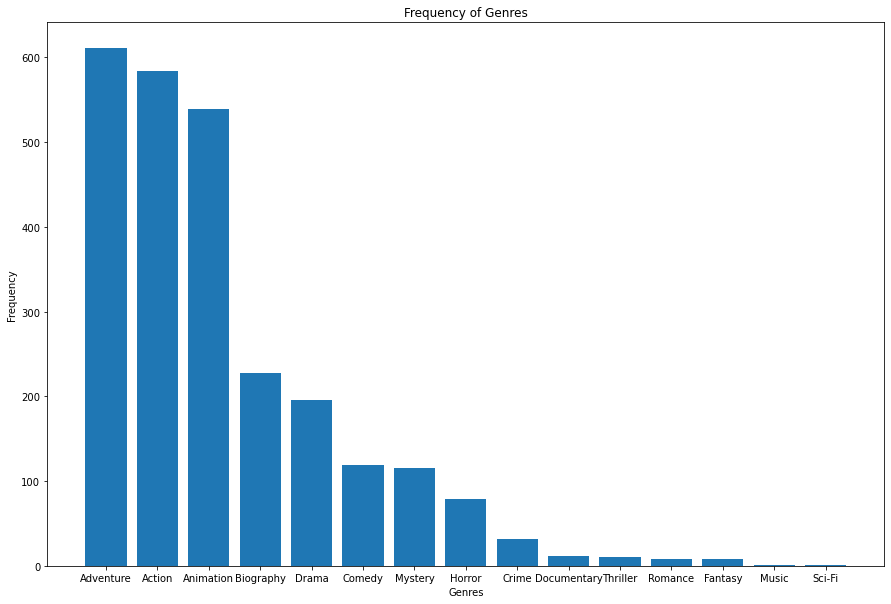

In [54]:
#Create bar chart
freq = total_comb['primary_genre'].value_counts()
x = range (15)
labels = total_comb['primary_genre'].unique()

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x, freq, tick_label = labels)

ax.set_title ("Frequency of Genres")
ax.set_xlabel ("Genres")
ax.set_ylabel ("Frequency");

In [55]:
# Plot a graph that shows average rating vs genre
# Will likely need to write some code first to get mean of each genre
avg_genre = total_comb.groupby('primary_genre')['averagerating'].mean()
avg_genre

primary_genre
Action         6.342808
Adventure      6.492347
Animation      6.865625
Biography      6.986842
Comedy         6.222820
Crime          6.686207
Documentary    7.262185
Drama          6.589198
Fantasy        6.181818
Horror         5.539241
Music          7.200000
Mystery        6.900000
Romance        5.862500
Sci-Fi         5.900000
Thriller       5.570000
Name: averagerating, dtype: float64

In [56]:
total_comb.head()

,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy
1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy
3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy
4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi


In [57]:
#Making a std dev graph with all genres in one graph ideally
# %matplotlib inline
# plt.style.use('ggplot')

# data_plot = total_comb({labels:total_comb['averagerating']},
#                          index = freq)
# data_plot

In [58]:
data_plot = pd.read_csv('./data/cleaned_total_comb.csv')
data_plot.head()

,Unnamed: 0,title,studio,year,total_gross,runtime_minutes,genres,averagerating,numvotes,primary_genre,sub_genre,other_genre
0,0,Toy Story 3,BV,2010,1067000000,103.0,"Adventure,Animation,Comedy",8.3,682218,Adventure,Animation,Comedy
1,1,Inception,WB,2010,828300000,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2,2,Shrek Forever After,P/DW,2010,752600000,93.0,"Adventure,Animation,Comedy",6.3,167532,Adventure,Animation,Comedy
3,3,The Twilight Saga: Eclipse,Sum.,2010,698500000,124.0,"Adventure,Drama,Fantasy",5.0,211733,Adventure,Drama,Fantasy
4,4,Iron Man 2,Par.,2010,623900000,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Action,Adventure,Sci-Fi


<AxesSubplot:title={'center':'averagerating'}, xlabel='primary_genre'>

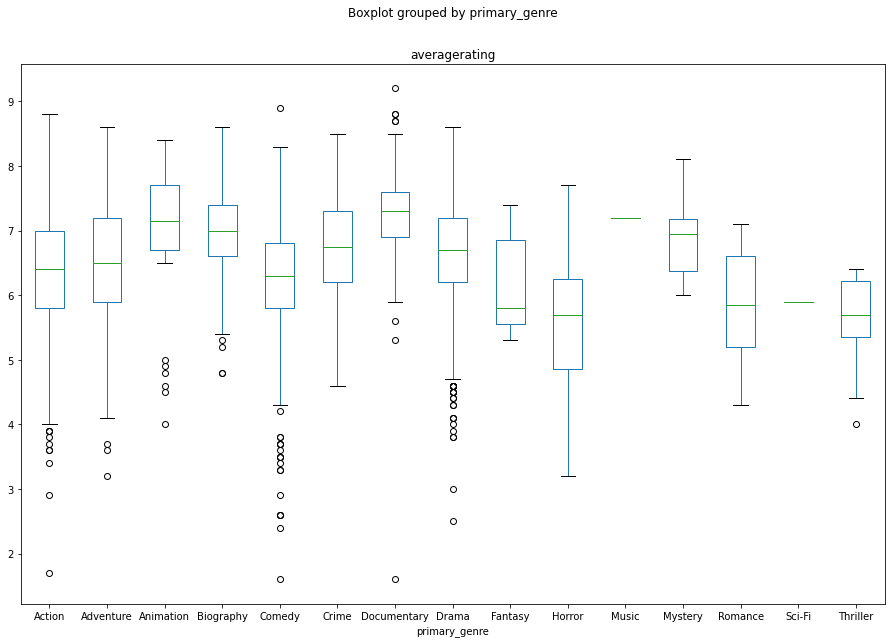

In [62]:
data_plot.boxplot(by = 'primary_genre', column = ['averagerating'], 
                  grid = False, 
                  figsize = (15,10))
#                   xlabel = "Genres",
#                   ylabel = "Average Rating",title = {'centre':"Interquartile Range of Average Rating by Genre"})

#                   title = ("Interquartile Range of Average Rating by Genre")
                  
# ax.set_xlabel("Genres")
# ax.set_ylabel("Average Rating")

In [63]:
total_comb_df = total_comb.groupby('primary_genre')['averagerating']
iqr_q1 = total_comb_df.quantile(0.25)
iqr_q3 = total_comb_df.quantile(0.75)
iqr_genre = iqr_q3 - iqr_q1
# iqr_genre = total_comb.groupby('primary_genre')['averagerating'].quantile()
iqr_genre

primary_genre
Action         1.200
Adventure      1.300
Animation      1.000
Biography      0.800
Comedy         1.000
Crime          1.100
Documentary    0.700
Drama          1.000
Fantasy        1.300
Horror         1.400
Music          0.000
Mystery        0.800
Romance        1.400
Sci-Fi         0.000
Thriller       0.875
Name: averagerating, dtype: float64

In [64]:
# (total_comb_df < (iqr_q1 - 1.5 * iqr_genre)) | (total_comb_df > (iqr_q3 + 1.5 * iqr_genre))
lower_outlier = (iqr_q1 - 1.5 * iqr_genre)
upper_outlier = (iqr_q3 + 1.5 * iqr_genre)
total_comb_df < lower_outlier | total_comb_df > upper_outlier

C:\Users\scott\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = op(x, y)


ValueError: operands could not be broadcast together with shapes (15,) (15,2) 

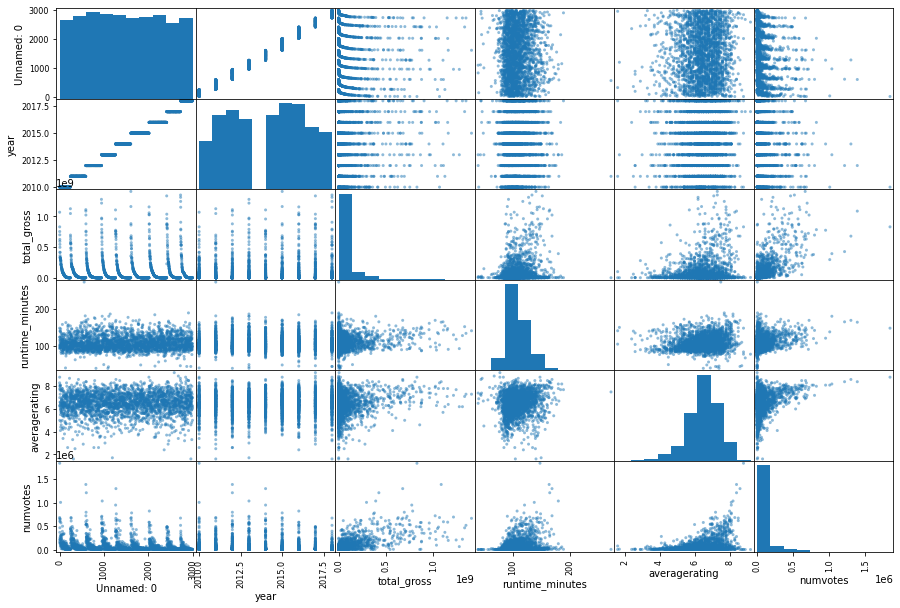

In [65]:
pd.plotting.scatter_matrix(data_plot, figsize=(15,10));

In [ ]:
# Eliminate outliers for numvotes
# Eliminate outliers from total_gross

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***